### good part about this technique it can be used on both numrical and catagorical data

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [4]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [27]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train

,Age,Fare
280,23.0,8.6625
284,2.0,20.2125
40,39.0,13.4167
17,21.0,7.2250
362,31.0,21.0000
...,...,...
299,29.0,7.8542
22,NaN,31.6833
72,29.0,7.9250
15,24.0,27.7208


In [29]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [30]:
X_train['Fare_imputed'] = X_train['Fare']
X_test['Fare_imputed'] = X_test['Fare']

In [31]:
X_train.head()

,Age,Fare,Age_imputed,Fare_imputed
280,23.0,8.6625,23.0,8.6625
284,2.0,20.2125,2.0,20.2125
40,39.0,13.4167,39.0,13.4167
17,21.0,7.2250,21.0,7.2250
362,31.0,21.0000,31.0,21.0000


In [32]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [33]:
X_train['Fare_imputed'][X_train['Fare_imputed'].isnull()] = X_train['Fare'].dropna().sample(X_train['Fare'].isnull().sum()).values
X_test['Fare_imputed'][X_test['Fare_imputed'].isnull()] = X_train['Fare'].dropna().sample(X_test['Fare'].isnull().sum()).values

In [34]:
X_train.head()

,Age,Fare,Age_imputed,Fare_imputed
280,23.0,8.6625,23.0,8.6625
284,2.0,20.2125,2.0,20.2125
40,39.0,13.4167,39.0,13.4167
17,21.0,7.2250,21.0,7.2250
362,31.0,21.0000,31.0,21.0000


In [35]:
X_train.isnull().sum()

Age             72
Fare             1
Age_imputed      0
Fare_imputed     0
dtype: int64

#### now you can see there is no missing value in age_imputed and Fare_imputed

In [37]:
X_train

,Age,Fare,Age_imputed,Fare_imputed
280,23.0,8.6625,23.0,8.6625
284,2.0,20.2125,2.0,20.2125
40,39.0,13.4167,39.0,13.4167
17,21.0,7.2250,21.0,7.2250
362,31.0,21.0000,31.0,21.0000
...,...,...,...,...
299,29.0,7.8542,29.0,7.8542
22,NaN,31.6833,24.0,31.6833
72,29.0,7.9250,29.0,7.9250
15,24.0,27.7208,24.0,27.7208


/tmp/ipykernel_5802/644270691.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=X_train["Age"], shade=True,color='green')
/tmp/ipykernel_5802/644270691.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=X_train["Age_imputed"], shade=True,color='red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


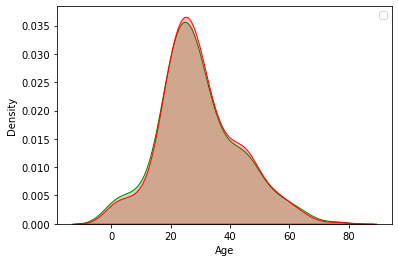

In [46]:
sns.kdeplot(data=X_train["Age"], shade=True,color='green')
sns.kdeplot(data=X_train["Age_imputed"], shade=True,color='red')

plt.legend()
plt.show()

/tmp/ipykernel_5802/4130063719.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=X_train["Fare"], shade=True,color='green')
/tmp/ipykernel_5802/4130063719.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=X_train["Fare_imputed"], shade=True,color='red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


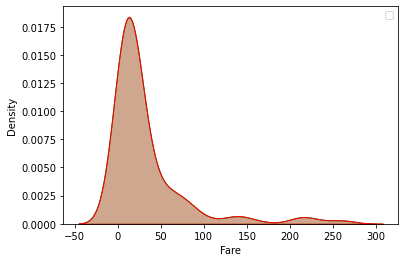

In [43]:
sns.kdeplot(data=X_train["Fare"], shade=True,color='green')
sns.kdeplot(data=X_train["Fare_imputed"], shade=True,color='red')

plt.legend()
plt.show()

In [49]:
X_train[['Age','Fare','Age_imputed','Fare_imputed']].cov()

,Age,Fare,Age_imputed,Fare_imputed
Age,184.704030,216.034928,184.704030,212.238045
Fare,216.034928,2333.007047,154.558521,2333.007047
Age_imputed,184.704030,154.558521,174.333349,152.315900
Fare_imputed,212.238045,2333.007047,152.315900,2327.105249


<AxesSubplot:>

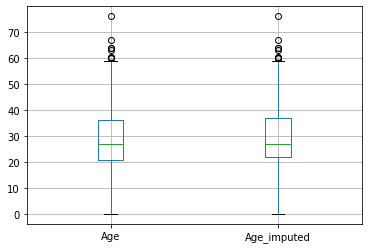

In [50]:
X_train[['Age', 'Age_imputed']].boxplot()

<AxesSubplot:>

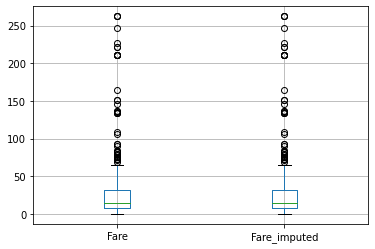

In [51]:
X_train[['Fare', 'Fare_imputed']].boxplot()

#### now there is one problem lets suppose when we deploy our project user select fare 50 and dos't select age our model automatical select age 40 bug if again user enter fare value 50 but this time our model select age 10 to thats problem we should remove this ......if user select fare 50 n time age must be remain same

In [54]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(obrevation['Fare']))

NameError: name 'obrevation' is not defined